## **Dans se fichier unsupervised** <br>

On prend en argument un jeu de données de 317 images RADAR <br>

Le but de ce fichier est de **tester l'algorithme kmeans** en **non supervisé** sur ce jeu de donnée. <br> 

On ne prend donc pas en considération : les tâches, le temps, les effets géométriques. <br>

L'algorithme va classer en **4 classes** *pour faire ressortir, par la suite, 3 classes de bateaux: Petit, Moyen, Grand & une classe Unknow (contenant les côtes, les vagues, etc...)* les images par rapport au **feature flatten()** -> concaténer les lignes de pixels d'une image en un vecteur unidimensionnel

### **Importations**

In [1]:
import cv2
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### **Traitement des images** <br>

#### Chargement des images dans le jeu de donnée

In [ ]:
# Chemin vers le répertoire contenant les images
directory = "../Image radar/"
image_files = os.listdir(directory)

### **Visualiser le jeu de donnée**

#### Affichage de 3 images radar relativement écarter temporellement les unes des autres 

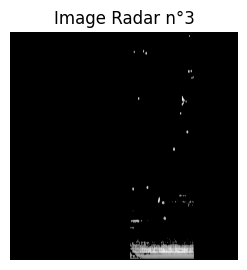

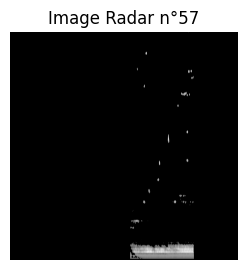

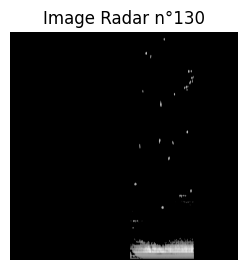

In [17]:
# Affichage de 3 images lambda de la base de données : 3ième, 57ième & 130ième  

for i in range(3):
    num=[3,57,130]
    img = cv2.imread(directory+image_files[num[i]], cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Image Radar n°{num[i]}')
    plt.axis('off')


plt.show()

### **Méthode non supervisé des K-means** <br>

#### Prépararer les features

In [14]:
# Fonction pour extraire les caractéristiques des images (ici, les valeurs de pixels)
def extract_features(image_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (100, 100))  # Redimensionner les images pour la même taille
    return resized_img.flatten()

# Liste pour stocker les caractéristiques extraites des images
features_list = []

# Extraction des caractéristiques pour chaque image
for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    features = extract_features(image_path)
    features_list.append(features)

# Convertir la liste en un tableau numpy
data = np.array(features_list)

#### Appliquer l'algorihtme Kmeans 

In [16]:
# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# Prédire les clusters pour chaque image
predicted_labels = kmeans.predict(data)

# Associer les images à leurs clusters prédits
image_cluster_map = dict(zip(image_files, predicted_labels))

C:\Users\lucie.papaix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### **Visualiser le clustering**

#### Afficher les 10 premières images de chaque classe 

Cluster 0:


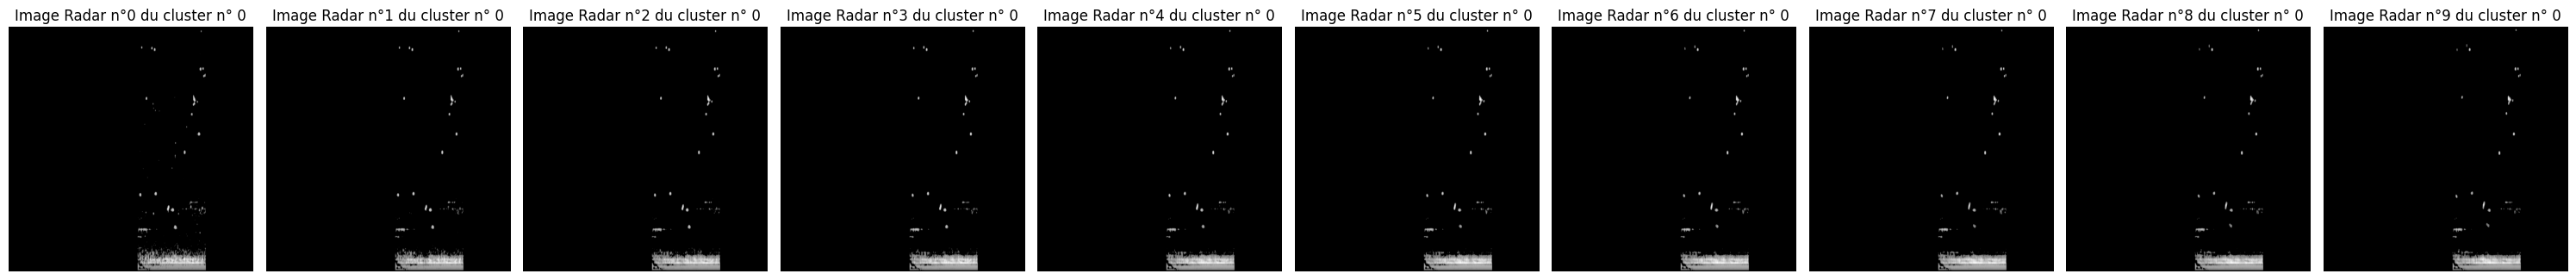

Cluster 1:


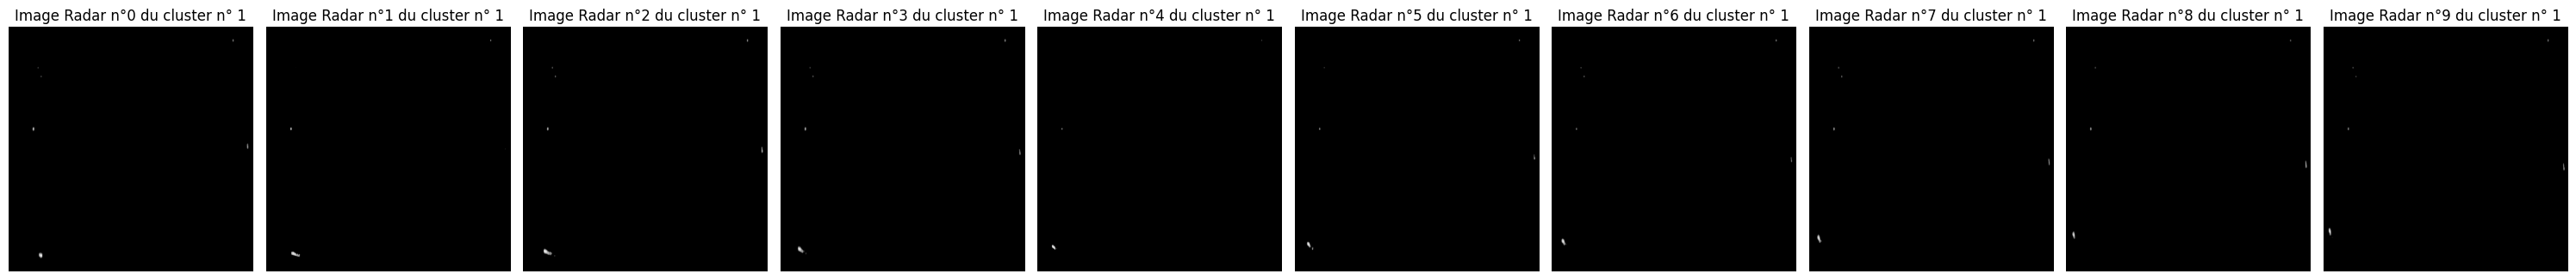

Cluster 2:


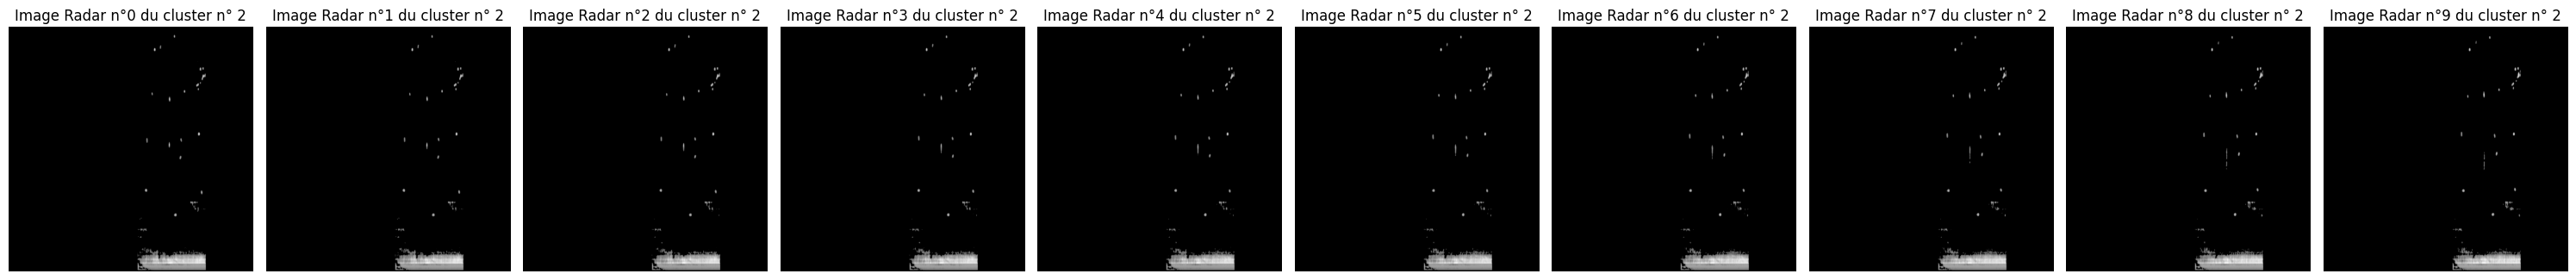

Cluster 3:


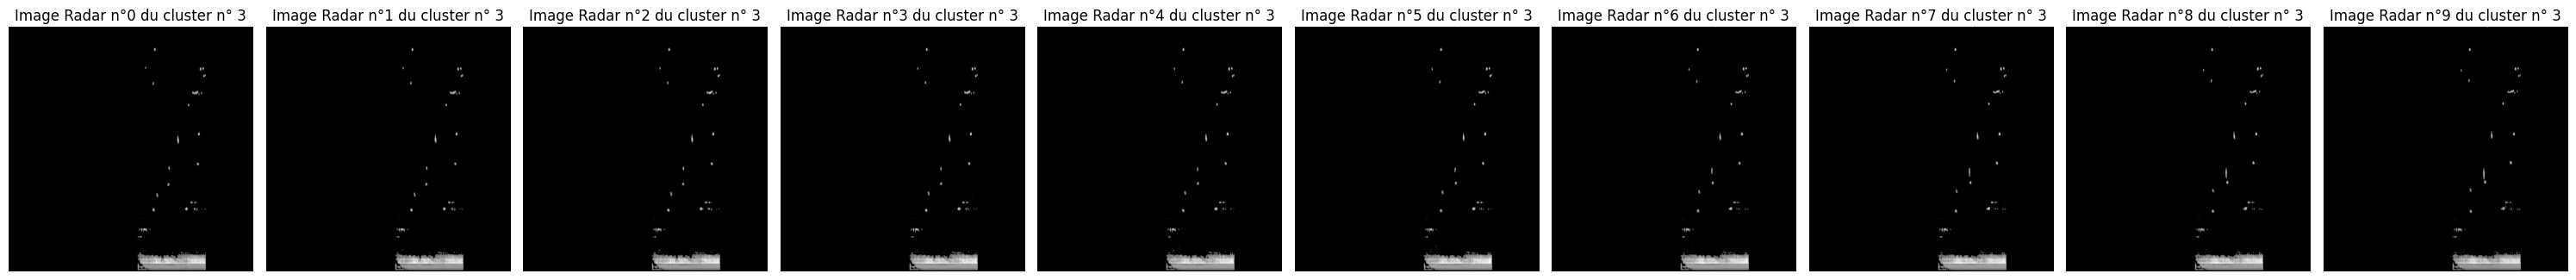

In [18]:
# Afficher les images pour chaque cluster
for cluster_id in range(4):
    print(f"Cluster {cluster_id}:")
    cluster_images = [image for image, label in image_cluster_map.items() if label == cluster_id] # extraire les images et leur classe associé qui ont été regrouper dans le dict

    plt.figure(figsize=(30, 10)) 

    for img_idx in range(min(10, len(cluster_images))):  # Limitez à 10 images par cluster ou taille du cluster (si contient moins de 10 images)
        img = cv2.imread(directory + cluster_images[img_idx], cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 10, img_idx + 1) 
        plt.imshow(img, cmap='gray')
        plt.title(f'Image Radar n°{img_idx} du cluster n° {cluster_id}')
        plt.axis('off')

    plt.tight_layout()  # Ajustez la disposition des sous-graphiques
    plt.show() 

## **Conclusion** <br>

Par visualisation des clusters: l'algorithme kmeans non supervisé sur des images semble satisfaisant 

**Perspectives**: 
- Tester un autre Algorihtme de clustering *(hiérarchique)*, 
- Trouver prétraitement d'image adéquat pour appliquer l'algorithme sur les tâches des images *(contour image: Sobel/Canny)*